In [18]:
import numpy as np
import pandas as pd
# import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import axes3d

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix
from sklearn.cluster import KMeans

In [2]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/fisher.csv'
iris = pd.read_csv(url)
iris_groups = iris.groupby('species')
print(iris.columns.values)
iris.head()

['species' 'petal_width' 'petal_length' 'sepal_width' 'sepal_length']


,species,petal_width,petal_length,sepal_width,sepal_length
0,setosa,2,14,33,50
1,setosa,2,10,36,46
2,setosa,2,16,31,48
3,setosa,1,14,36,49
4,setosa,2,13,32,44


You can use scatterplots to help you see where the groups are.  There are some automated tools for this (see scatterplot matrices) but in this case, let's manually change the x and y variables to investigate which combination of variables best separates the groups.

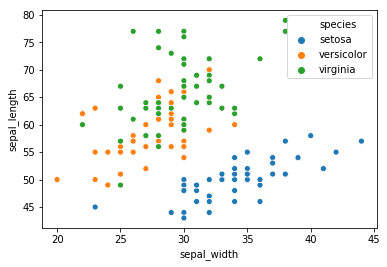

In [3]:
seaborn.scatterplot(data=iris,x='sepal_width',y='sepal_length',hue='species')

Of course scatterplots don't need to be in two dimensions.  We can use different symbols (e.g., exes and ohs) or hue to visualize different categories.  We could use dot size (e.g., bubble plots) to indicate a third quantitative variable.

Alternatively, we could construct a 3D plot to visualize a third quantitative variable (and then use size to visualize a fourth, if we wanted!).

<IPython.core.display.Javascript object>


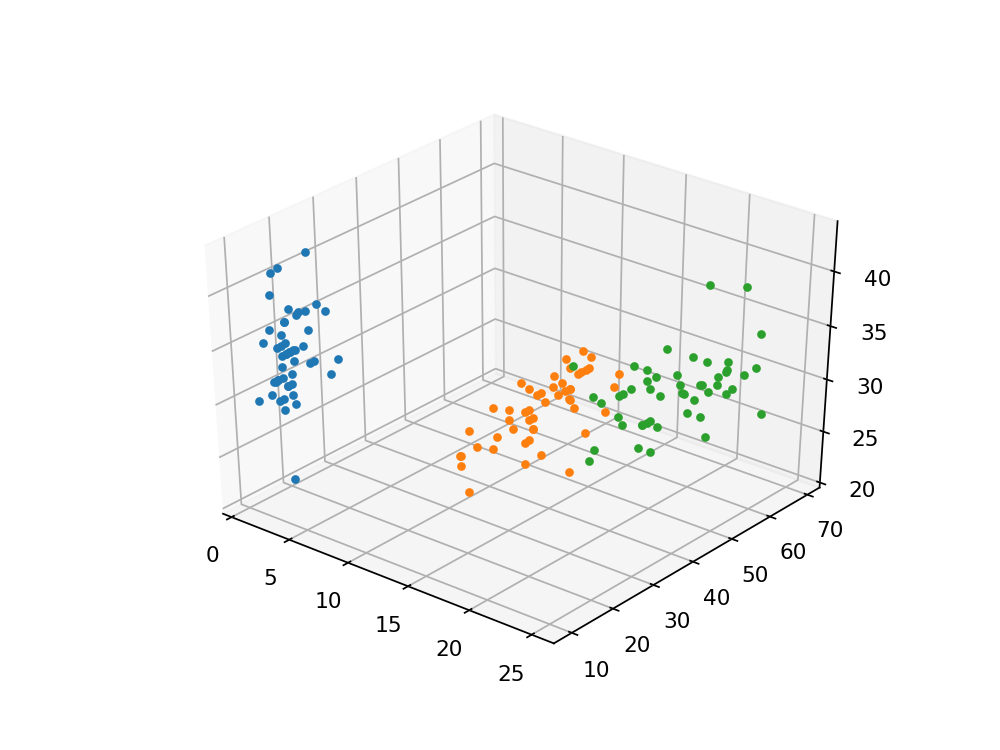

In [4]:
# We'll use the notebook plotting mechanism to do this one, since it's interactive.
# Note: This won't work if you've already run a %matplotlib inline (as below)
# See https://stackoverflow.com/questions/41125690/matplotlib-notebook-showing-a-blank-histogram

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for name, group in iris_groups:
    ax.plot3D(group['petal_width'],group['petal_length'],group['sepal_width'],'.')

# Linear Discriminant Analysis

[[ 2.46 14.62]
 [13.26 43.22]
 [20.06 55.52]]


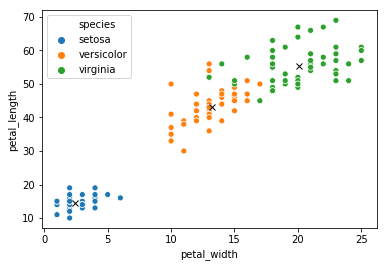

In [23]:
# Create a LDA object
lda = LinearDiscriminantAnalysis()

# Fit the data
X = iris.loc[:,['petal_width','petal_length']]
y = iris['species']
lda_result = lda.fit(X, y)

# The predicted labels/categories can be recovered like so:
predictions = lda.predict(X)

#See the results
print(lda_result.means_)

%matplotlib inline
_ = seaborn.scatterplot(data=iris,x='petal_width',y='petal_length',hue='species')
_ = plt.plot(lda_result.means_[:,0],lda_result.means_[:,1],'kx')

# Classification accuracy assessment

In [12]:
# Many tools are available in scikit learn to assess accuracy
c_matrix = confusion_matrix(iris.species,predictions)
print(c_matrix)

class_report = classification_report(iris.species,predictions,labels=np.unique(iris.species))
print(class_report)

kappa = cohen_kappa_score(iris.species,predictions)
print('Cohens Kappa:',kappa)

[[50  0  0]
 [ 0 48  2]
 [ 0  5 45]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.91      0.96      0.93        50
    virginia       0.96      0.90      0.93        50

   micro avg       0.95      0.95      0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

Cohens Kappa: 0.9299999999999999


In [17]:
# Would using more columns have improved our classification?

# Fit the data
X = iris.iloc[:,1:]
print(X.head())
y = iris['species']
lda_result = lda.fit(X, y)

# The predicted labels/categories can be recovered like so:
predictions = lda.predict(X)

c_matrix = confusion_matrix(iris.species,predictions)
print(c_matrix)

class_report = classification_report(iris.species,predictions,labels=np.unique(iris.species))
print(class_report)

kappa = cohen_kappa_score(iris.species,predictions)
print('Cohens Kappa:',kappa)

   petal_width  petal_length  sepal_width  sepal_length
0            2            14           33            50
1            2            10           36            46
2            2            16           31            48
3            1            14           36            49
4            2            13           32            44
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.96      0.96        50
    virginia       0.96      0.96      0.96        50

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Cohens Kappa: 0.96


# k-means clustering

[[ 2.46 14.62]
 [19.88 55.92]
 [13.44 42.82]]


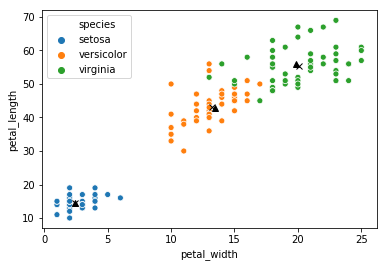

In [26]:
X = iris.loc[:,['petal_width','petal_length']]

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

print(kmeans.cluster_centers_)

_ = seaborn.scatterplot(data=iris,x='petal_width',y='petal_length',hue='species')
_ = plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'k^')
_ = plt.plot(lda_result.means_[:,0],lda_result.means_[:,1],'kx')

In [42]:
# We can inspect the labels created, but these don't have names (k-means didn't know them)
print(kmeans.labels_)

# So we'll have to do a recode to compare using pandas and a dictionary showing how to transform our data
predictions = pd.Series(kmeans.labels_).replace({0:'setosa',1:'virginica',2:'versicolor'})
#print(predictions)

print(np.unique(iris.species))
print(np.unique(predictions))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 1 2 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]
['setosa' 'versicolor' 'virginia']
['setosa' 'versicolor' 'virginica']


In [38]:
# Now we can run the accuracy numbers:

c_matrix = confusion_matrix(iris.species,predictions)
print(c_matrix)

class_report = classification_report(iris.species,predictions)
print(class_report)

kappa = cohen_kappa_score(iris.species,predictions)
print('Cohens Kappa:',kappa)

[[50  0  0  0]
 [ 0 46  0  4]
 [ 0  4  0 46]
 [ 0  0  0  0]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.92      0.92        50
    virginia       0.00      0.00      0.00        50
   virginica       0.00      0.00      0.00         0

   micro avg       0.64      0.64      0.64       150
   macro avg       0.48      0.48      0.48       150
weighted avg       0.64      0.64      0.64       150

Cohens Kappa: 0.5371428571428571


c:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined